In [2]:
DATA_FILE_NAME = "SMSSpamCollection" #название файла

In [16]:
sms_texts, class_labels = [], []   #массив смс и массив лэблов

with open(DATA_FILE_NAME, encoding="latin-1") as f:
    for line in f:
        if line.strip():
            fields = line.strip().split("\t")
            
            class_labels.append(1 if fields[0] == "spam" else 0)
            
            sms_texts.append(fields[1])

In [17]:
sms_texts[:5]

['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
 'Ok lar... Joking wif u oni...',
 "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
 'U dun say so early hor... U c already then say...',
 "Nah I don't think he goes to usf, he lives around here though"]

In [18]:
class_labels[:5]

[0, 0, 1, 0, 0]

In [19]:
data_set = set()  #контейнер для уникальный слов
new_sms = []      #масив переработанных смс(все буквы в нижнем регистре и отрезаны все символы перечисленные ниже в коде)
for element in sms_texts:
    x = element.strip().lower().split()   #отрезаем знаки табуляции и пробелы.приводим к нижнему регистру.переводим в список
    x = [i.strip(":;,./|\?!><{}[]()-_ *#@$&^=+№") for i in x] #отдельно "чистим" каждое слово в смс
    new_sms.append(x)                   
    for slovo in x:
        if slovo !="":
            data_set.add(slovo)

In [20]:
data_map = {}          #создаем словарь где ключом будет слово и значение номер слова
for i,slovo in enumerate(data_set):
    data_map[slovo] = i

In [21]:
smsdat = [[data_map[i] for i in j if i != ''] for j in new_sms] #переводим слова в цифры

In [22]:
len(smsdat[0])

20

In [23]:
len(new_sms[0])

20

In [24]:
maxlen = max([len(i) for i in smsdat])

In [25]:
maxlen #максимально длинное смс

171

In [26]:
newsmsdat = []
for i in smsdat:
    newrow = i.copy()
    while len(newrow) < maxlen:   #добиваем короткие смс до максимальной дли налями
        newrow.append(0)
    newsmsdat.append(newrow)

***

In [13]:
len(new_sms)

5574

In [14]:
len(data_set)

10007

In [27]:
new_data_107 = []      #другой способ преобразования. каждая строка имеет длину всего словаря уникальных слов ->
qq = list(data_set)   #слова с соотведствующим индексом в словаре обозначены цифрой(колличество встречаний его в предложении)
for i in range(len(new_sms)):
    ert = []
    for j in range(len(data_set)):
        q = new_sms[i].count(qq[j])
        ert.append(q)
    #print(i)
    new_data_107.append(ert)

In [9]:
from sklearn.feature_extraction.text import CountVectorizer #этот модуль делает тожесамое как он работает описано ниже
import numpy as np
#колличество эллементов может слегка отличатся ибо он иначе вырезал лишние симоволы
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(sms_texts)

In [15]:
stroka = X.toarray()[0]   #вот первая строка

In [28]:
stroka

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [31]:
oldstrika = np.array(new_data_107[0])

In [32]:
oldstrika

array([0, 0, 0, ..., 0, 0, 0])

In [33]:
stroka.shape

(8749,)

In [34]:
oldstrika.shape

(10007,)

* как видите их размеры весьма разнятся 
* можете проверить как повлияет изменение этой самой размерности на тот достаточно недурной результат что мы получили на уроке

In [16]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB
from sklearn.model_selection import GridSearchCV
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

In [22]:
sum(new_data_107[0])

20

In [19]:
model = GridSearchCV(estimator = MultinomialNB(),param_grid={"alpha": np.logspace(-6, -3, 4)})
#модель позволяющая подобрать оптимальные настройки алгаритма

In [23]:
model.fit(new_data_107,class_labels)

GridSearchCV(cv=None, error_score='raise',
       estimator=MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': array([1.e-06, 1.e-05, 1.e-04, 1.e-03])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

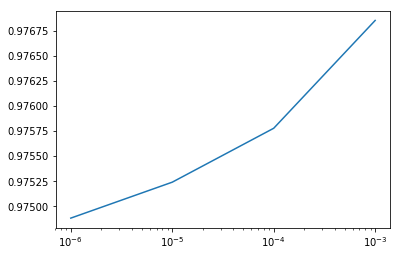

In [25]:
xs = model.cv_results_["param_alpha"].data
ys = model.cv_results_["mean_test_score"]
_ = plt.semilogx(xs, ys)

In [26]:
x_train,x_test,label_train,label_test = train_test_split(new_data_107,class_labels)

In [30]:
model1 = MultinomialNB(alpha = 0.001)

In [31]:
model1.fit(x_train,label_train)

MultinomialNB(alpha=0.001, class_prior=None, fit_prior=True)

In [33]:
model1.score(x_test,label_test)

0.9820659971305595

In [34]:
model2 = MultinomialNB(alpha = 0.001)

In [35]:
x_train2,x_test2,label_train2,label_test2 = train_test_split(newsmsdat,class_labels)

In [36]:
model2.fit(x_train2,label_train2)

MultinomialNB(alpha=0.001, class_prior=None, fit_prior=True)

In [38]:
model2.score(x_test2,label_test2)

0.7589670014347202

In [45]:
model_Ber = GridSearchCV(estimator =   BernoulliNB(),param_grid={"alpha": np.logspace(-6, -3, 4)})

In [46]:
model_Ber.fit(new_data_107,class_labels)

GridSearchCV(cv=None, error_score='raise',
       estimator=BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': array([1.e-06, 1.e-05, 1.e-04, 1.e-03])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

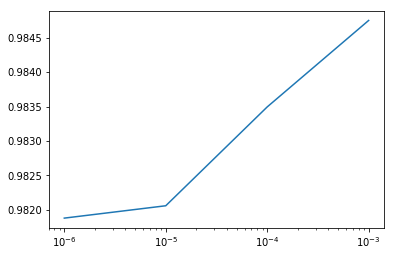

In [47]:
xs = model_Ber.cv_results_["param_alpha"].data
ys = model_Ber.cv_results_["mean_test_score"]
_ = plt.semilogx(xs, ys)

In [48]:
model_Bernu = BernoulliNB(alpha = 0.001)

In [49]:
model_Bernu.fit(x_train,label_train)

BernoulliNB(alpha=0.001, binarize=0.0, class_prior=None, fit_prior=True)

In [51]:
model_Bernu.score(x_test,label_test)

0.9878048780487805

In [52]:
pred = model_Bernu.predict(x_test)

In [57]:
pred = np.array(pred)

In [58]:
label = np.array(label_test)

In [59]:
score = label - pred

In [63]:
from sklearn.metrics import confusion_matrix

In [65]:
confusion_matrix(label,pred)

array([[1224,    6],
       [  11,  153]], dtype=int64)

In [66]:
from sklearn.linear_model import LogisticRegression

In [77]:
model_grid_lo = GridSearchCV(estimator = LogisticRegression() ,param_grid={"C": list(range(1,10))})

In [78]:
model_grid_lo.fit(new_data_107,class_labels)

GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

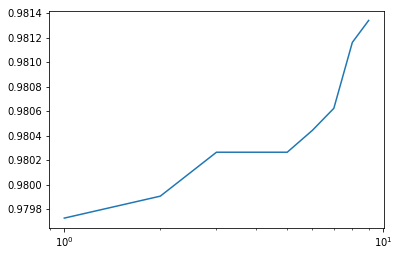

In [79]:
xs = model_grid_lo.cv_results_["param_C"].data
ys = model_grid_lo.cv_results_["mean_test_score"]
_ = plt.semilogx(xs, ys)

In [80]:
model_log = LogisticRegression(C=10)

In [82]:
model_log.fit(x_train,label_train)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [84]:
model.score(x_test,label_test)

0.9985652797704447

In [85]:
from sklearn.model_selection import cross_val_score

In [104]:
obj = cross_val_score(estimator=LogisticRegression(C = 10),X = new_data_107,y = class_labels,cv = 5)

In [106]:
obj

array([0.98476703, 0.98028674, 0.97755835, 0.98025135, 0.98204668])

In [107]:
from sklearn.tree import DecisionTreeClassifier

In [108]:
DecisionTreeClassifier?